<a href="https://colab.research.google.com/github/lucianapopa/Python_Data_Analysis_Event_Alura/blob/main/notebooks/Classes_Alura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Python Data Analysis Event - Alura**

# CLASS 01

Data Analysis with Pandas

In [1]:
import pandas as pd

# Library used for data analysis.

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv")

# 'pd' is used to retrieve the library for database reading.

# If a link is included on the code it must be between quotes.

In [3]:
df.head()

# This command is used to visualize the data inside the file.

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


We can see that the data is organized, but it suggests that improvements must be done to enhance data analysis and further visualization.

The data presents information on employees seniority, job title, salary, location, work location, among other data.

Analysis regarding the relationship between experience level and salary across different job sectors might be valuable when analyzing which job has higher salaries,or even in comparison with other metrics for example analyzing salaries with a company's revenue.

In [4]:
df.info()

# To obtain general information about the database.

# We can observe the columns, quantity of information, if there is null values or not, and the data type.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           133339 non-null  float64
 1   experience_level    133349 non-null  object 
 2   employment_type     133349 non-null  object 
 3   job_title           133349 non-null  object 
 4   salary              133349 non-null  int64  
 5   salary_currency     133349 non-null  object 
 6   salary_in_usd       133349 non-null  int64  
 7   employee_residence  133349 non-null  object 
 8   remote_ratio        133349 non-null  int64  
 9   company_location    133349 non-null  object 
 10  company_size        133349 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.2+ MB


In [5]:
df.describe()

# To visualize descriptive statistic data.

# Utilizes numeric values.

,work_year,salary,salary_in_usd,remote_ratio
count,133339.000000,1.333490e+05,133349.000000,133349.000000
mean,2024.358770,1.632833e+05,157617.272098,20.905669
std,0.680627,2.173860e+05,74288.363097,40.590044
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060200e+05,106000.000000,0.000000
50%,2024.000000,1.470000e+05,146206.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [6]:
df.shape

# Since it is an attribute instead of method or function parenthesis is not used.

# Tuples and columns quantities are displayed.

(133349, 11)

In [7]:
lines, columns = df.shape[0], df.shape[1]

print("Lines:", lines)
print("Columns:", columns)

Lines: 133349
Columns: 11


In [8]:
df.columns

# We can see all the columns' names at once.

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [9]:
df = df.rename(columns={
    'work_year': 'year',
    'experience_level': 'seniority',
    'employment_type': 'contract',
    'salary_currency': 'currency',
    'salary_in_usd': 'usd',
    'employee_residence': 'residence',
    'remote_ratio': 'work_type'
})

display(df.head())

# As part of the practice, I've changed the column names from English to Brazilian Portuguese.

# If I decide to rename columns again, the previous line must be previously run.

,year,seniority,contract,job_title,salary,currency,usd,residence,work_type,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [10]:
df["seniority"].value_counts()

# Verifying each category frequency within the 'experience level' column.

# We can see that the majority of analysed employees are seniors.

,count
seniority,
SE,77241
MI,40465
EN,12443
EX,3200


In [11]:
df["contract"].value_counts()

# Employment contract frequency: full-time, contract, part-time, freelancer.

# The majority of contracts are full-time.

,count
contract,
FT,132563
CT,394
PT,376
FL,16


In [12]:
df["work_type"].value_counts()

# 0 = on-site
# 50 = remote
# 100 = hybrid

# The majority of employees work on-site.

,count
work_type,
0,105312
100,27718
50,319


In [13]:
df["company_size"].value_counts()

# The majority of companies are medium-sized.

,count
company_size,
M,129561
L,3574
S,214


In [14]:
# Renaming the categories within the columns replacing abbreviations for full terms for better understanding.

In [15]:
seniority = {
    'SE': 'Senior',
    'MI': 'Mid-level',
    'EN': 'Junior',
    'EX': 'Executive'
}

df['seniority'] = df['seniority'].replace(seniority)

display(df.head())

,year,seniority,contract,job_title,salary,currency,usd,residence,work_type,company_location,company_size
0,2025.0,Senior,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,Senior,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,Mid-level,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,Mid-level,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,Junior,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [16]:
contract = {
    'FT': 'Full-time',
    'CT': 'Contract',
    'PT': 'Part-time',
    'FL': 'Freelancer'
}

df['contract'] = df['contract'].replace(contract)

display(df.head())

,year,seniority,contract,job_title,salary,currency,usd,residence,work_type,company_location,company_size
0,2025.0,Senior,Full-time,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,Senior,Full-time,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,Mid-level,Full-time,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,Mid-level,Full-time,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,Junior,Full-time,Data Engineer,90000,USD,90000,US,0,US,M


In [17]:
company_size = {
    'S': 'Small',
    'M': 'Medium',
    'L': 'Large'
}

df['company_size'] = df['company_size'].replace(company_size)

display(df.head())

,year,seniority,contract,job_title,salary,currency,usd,residence,work_type,company_location,company_size
0,2025.0,Senior,Full-time,Solutions Engineer,214000,USD,214000,US,100,US,Medium
1,2025.0,Senior,Full-time,Solutions Engineer,136000,USD,136000,US,100,US,Medium
2,2025.0,Mid-level,Full-time,Data Engineer,158800,USD,158800,AU,0,AU,Medium
3,2025.0,Mid-level,Full-time,Data Engineer,139200,USD,139200,AU,0,AU,Medium
4,2025.0,Junior,Full-time,Data Engineer,90000,USD,90000,US,0,US,Medium


In [18]:
work_type = {
    0: 'On-site',
    50: 'Remote',
    100: 'Hybrid'
}

df['work_type'] = df['work_type'].replace(work_type)

display(df.head())

,year,seniority,contract,job_title,salary,currency,usd,residence,work_type,company_location,company_size
0,2025.0,Senior,Full-time,Solutions Engineer,214000,USD,214000,US,Hybrid,US,Medium
1,2025.0,Senior,Full-time,Solutions Engineer,136000,USD,136000,US,Hybrid,US,Medium
2,2025.0,Mid-level,Full-time,Data Engineer,158800,USD,158800,AU,On-site,AU,Medium
3,2025.0,Mid-level,Full-time,Data Engineer,139200,USD,139200,AU,On-site,AU,Medium
4,2025.0,Junior,Full-time,Data Engineer,90000,USD,90000,US,On-site,US,Medium


In [19]:
df.head()

# The categories and columns are now clearly defined.

,year,seniority,contract,job_title,salary,currency,usd,residence,work_type,company_location,company_size
0,2025.0,Senior,Full-time,Solutions Engineer,214000,USD,214000,US,Hybrid,US,Medium
1,2025.0,Senior,Full-time,Solutions Engineer,136000,USD,136000,US,Hybrid,US,Medium
2,2025.0,Mid-level,Full-time,Data Engineer,158800,USD,158800,AU,On-site,AU,Medium
3,2025.0,Mid-level,Full-time,Data Engineer,139200,USD,139200,AU,On-site,AU,Medium
4,2025.0,Junior,Full-time,Data Engineer,90000,USD,90000,US,On-site,US,Medium


In [20]:
df.describe(include = "object")

# General information on the categorical variables.

# Here we have:
# - Count: how many values we have on a column,
# - Unique: unique values within each column,
# - Top: most frequent information within each column,
# - Freq: how many time the most frequent value appears on each column.

,seniority,contract,job_title,currency,residence,work_type,company_location,company_size
count,133349,133349,133349,133349,133349,133349,133349,133349
unique,4,4,390,26,102,3,95,3
top,Senior,Full-time,Data Scientist,USD,US,On-site,US,Medium
freq,77241,132563,17314,126140,119579,105312,119641,129561


In [21]:
df.describe()

# General data on categorical data.

# There is over 100,000 analysed data.

# For statistical purposes all the metrics present on the table are extremely useful such as central tendency
# measures, quartiles and min/max values.

,year,salary,usd
count,133339.000000,1.333490e+05,133349.000000
mean,2024.358770,1.632833e+05,157617.272098
std,0.680627,2.173860e+05,74288.363097
min,2020.000000,1.400000e+04,15000.000000
25%,2024.000000,1.060200e+05,106000.000000
50%,2024.000000,1.470000e+05,146206.000000
75%,2025.000000,1.990000e+05,198000.000000
max,2025.000000,3.040000e+07,800000.000000


# CLASS 02

Data Preparation and Cleaning

In [22]:
df.isnull()

# Where there is no null value 'False' will be attributed to that value, otherwise, it will be 'True'.

,year,seniority,contract,job_title,salary,currency,usd,residence,work_type,company_location,company_size
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
133344,False,False,False,False,False,False,False,False,False,False,False
133345,False,False,False,False,False,False,False,False,False,False,False
133346,False,False,False,False,False,False,False,False,False,False,False
133347,False,False,False,False,False,False,False,False,False,False,False


In [23]:
df.isnull().sum()

# This is used to capture in which columns we have null values, and their count.

# We can see that 10 rows on the year column are missing.

,0
year,10
seniority,0
contract,0
job_title,0
salary,0
currency,0
usd,0
residence,0
work_type,0
company_location,0


In [24]:
df['year'].unique()

# When retrieving the unique values within the year column, the years from 2020 to 2025 are present, as well as the NaN (not a number).

array([2025.,   nan, 2024., 2022., 2023., 2020., 2021.])

In [25]:
df[df.isnull().any(axis=1)]

# By filtering, the full database can be seen including only the rows where the year column is null.

# Now, we can see those 10 rows with missing values on the year column.

,year,seniority,contract,job_title,salary,currency,usd,residence,work_type,company_location,company_size
5588,NaN,Senior,Full-time,Product Manager,184500,USD,184500,US,On-site,US,Medium
59692,NaN,Mid-level,Full-time,Engineer,110000,USD,110000,DE,On-site,DE,Medium
59710,NaN,Junior,Full-time,Data Scientist,208800,USD,208800,US,On-site,US,Medium
59759,NaN,Senior,Full-time,Software Engineer,135000,USD,135000,US,On-site,US,Medium
59789,NaN,Senior,Full-time,Engineer,112000,USD,112000,US,On-site,US,Medium
131000,NaN,Senior,Full-time,Machine Learning Engineer,163800,USD,163800,US,On-site,US,Medium
131006,NaN,Senior,Full-time,Data Analytics Manager,204500,USD,204500,US,On-site,US,Medium
133054,NaN,Junior,Full-time,Data Scientist,40000,USD,40000,JP,Hybrid,MY,Large
133281,NaN,Mid-level,Full-time,Machine Learning Engineer,180000,PLN,46597,PL,Hybrid,PL,Large
133317,NaN,Mid-level,Full-time,Data Scientist,130000,USD,130000,US,Remote,US,Large


**Dealing with missing values using 'mean'**

When there are missing values we must deal with them in the best way to don't generate a negative impact in the database quality.

For missing values cases, there are 3 options on how to deal with them:
* Input values,
* Delete values,
* Measures of central tendency as imputation.

In [26]:
# A new data frame will be created so we can see how to deal with numerical missing values using mean.

import numpy as np
import pandas as pd

df_salaries = pd.DataFrame({
    'name': ["Ana", "Bruno", "Carlos", "Daniele","Val"],
    'salary': [4000, np.nan, 5000, np.nan, 100000]
})

# Calculating average wage and replacing null values by the rounded average:

df_salaries['salary_avg'] = df_salaries['salary'].fillna(df_salaries['salary'].mean().round(2))

# Calculating median wage and replacing null values by the rounded average:

df_salaries['salary_median'] = df_salaries['salary'].fillna(df_salaries['salary'].median())

# Displaying the data:
df_salaries

,name,salary,salary_avg,salary_median
0,Ana,4000.0,4000.00,4000.0
1,Bruno,NaN,36333.33,5000.0
2,Carlos,5000.0,5000.00,5000.0
3,Daniele,NaN,36333.33,5000.0
4,Val,100000.0,100000.00,100000.0


Before, Bruno and Daniele had null values for their wages. Then the average of the salaries was used to fill those missing values.

If outliers are present in the database, the average won't be a good way of handling those missing values. In this case, we would use the median instead.

In [27]:
'''We can also replace missing values with the previous value with the forward fill method.'''

import pandas as pd
import numpy as np

df_temperatures = pd.DataFrame({
  "Day": ["Monday","Tuesday","Wednesday","Thursday","Friday"],
  "Temperature": [30, np.nan, np.nan, 28, 27]
})

df_temperatures["filled_ffill"] = df_temperatures['Temperature'].ffill()

df_temperatures

,Day,Temperature,filled_ffill
0,Monday,30.0,30.0
1,Tuesday,NaN,30.0
2,Wednesday,NaN,30.0
3,Thursday,28.0,28.0
4,Friday,27.0,27.0


In [28]:
'''We can also replace missing values with the next value with the backward fill method.'''

import pandas as pd
import numpy as np

df_temperatures = pd.DataFrame({
  "Day": ["Monday","Tuesday","Wednesday","Thursday","Friday"],
  "Temperature": [30, np.nan, np.nan, 28, 27]
})

df_temperatures["filled_bfill"] = df_temperatures['Temperature'].bfill()

df_temperatures

,Day,Temperature,filled_bfill
0,Monday,30.0,30.0
1,Tuesday,NaN,28.0
2,Wednesday,NaN,28.0
3,Thursday,28.0,28.0
4,Friday,27.0,27.0


In [29]:
'''Missing values can also be replaced with a fixed value.'''
'''This example presents how to replace a null value with "Not informed".'''

import pandas as pd
import numpy as np

df_cities = pd.DataFrame({
  'name': ["Ana", "Bruno", "Carlos", "Daniele","Val"],
  'city': ["Sao Paulo", np.nan, "Curitiba", np.nan, "Belem"]

})

# Filling null values with fixed value.
df_cities['city_filled'] = df_cities['city'].fillna("Not informed")

df_cities

,name,city,city_filled
0,Ana,Sao Paulo,Sao Paulo
1,Bruno,NaN,Not informed
2,Carlos,Curitiba,Curitiba
3,Daniele,NaN,Not informed
4,Val,Belem,Belem


Going back to the dataset that is being used, we have 10 missing values in the year column.

By analyzing the data and the possible handling methods, we can delete those rows with missing values, since our dataset has over 100,000 rows in total.

In [30]:
df_cleaned = df.dropna()

# This code will remove any row with missing values from the database.
# This does not change the original DataFrame because 'inplace=True' was not used.

In [31]:
df_cleaned.isnull().sum()

# Now we can see that there is no missing values anymore.

,0
year,0
seniority,0
contract,0
job_title,0
salary,0
currency,0
usd,0
residence,0
work_type,0
company_location,0


In [32]:
df_cleaned.head()

# We can see that the year column presents a '.0' after the year, which is not correct.

# Therefore, we will move forward to analyse the data structure.

,year,seniority,contract,job_title,salary,currency,usd,residence,work_type,company_location,company_size
0,2025.0,Senior,Full-time,Solutions Engineer,214000,USD,214000,US,Hybrid,US,Medium
1,2025.0,Senior,Full-time,Solutions Engineer,136000,USD,136000,US,Hybrid,US,Medium
2,2025.0,Mid-level,Full-time,Data Engineer,158800,USD,158800,AU,On-site,AU,Medium
3,2025.0,Mid-level,Full-time,Data Engineer,139200,USD,139200,AU,On-site,AU,Medium
4,2025.0,Junior,Full-time,Data Engineer,90000,USD,90000,US,On-site,US,Medium


In [33]:
df_cleaned.info()

# Since the year variable is float64, it is considering that it has decimals.

# To solve this issue, a transformation will be applied so the year is presented as integer.

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   year              133339 non-null  float64
 1   seniority         133339 non-null  object 
 2   contract          133339 non-null  object 
 3   job_title         133339 non-null  object 
 4   salary            133339 non-null  int64  
 5   currency          133339 non-null  object 
 6   usd               133339 non-null  int64  
 7   residence         133339 non-null  object 
 8   work_type         133339 non-null  object 
 9   company_location  133339 non-null  object 
 10  company_size      133339 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.2+ MB


In [34]:
# Transforming float64 data to int64:

df_cleaned = df_cleaned.assign(year = df_cleaned['year'].astype('int64'))

In [35]:
# Now, it is important to check if the data is correctly transformed.

df_cleaned

,year,seniority,contract,job_title,salary,currency,usd,residence,work_type,company_location,company_size
0,2025,Senior,Full-time,Solutions Engineer,214000,USD,214000,US,Hybrid,US,Medium
1,2025,Senior,Full-time,Solutions Engineer,136000,USD,136000,US,Hybrid,US,Medium
2,2025,Mid-level,Full-time,Data Engineer,158800,USD,158800,AU,On-site,AU,Medium
3,2025,Mid-level,Full-time,Data Engineer,139200,USD,139200,AU,On-site,AU,Medium
4,2025,Junior,Full-time,Data Engineer,90000,USD,90000,US,On-site,US,Medium
...,...,...,...,...,...,...,...,...,...,...,...
133344,2020,Senior,Full-time,Data Scientist,412000,USD,412000,US,Hybrid,US,Large
133345,2021,Mid-level,Full-time,Principal Data Scientist,151000,USD,151000,US,Hybrid,US,Large
133346,2020,Junior,Full-time,Data Scientist,105000,USD,105000,US,Hybrid,US,Small
133347,2020,Junior,Contract,Business Data Analyst,100000,USD,100000,US,Hybrid,US,Large


In [36]:
# A double-check on data type that can be done is looking at the data information again.

df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   year              133339 non-null  int64 
 1   seniority         133339 non-null  object
 2   contract          133339 non-null  object
 3   job_title         133339 non-null  object
 4   salary            133339 non-null  int64 
 5   currency          133339 non-null  object
 6   usd               133339 non-null  int64 
 7   residence         133339 non-null  object
 8   work_type         133339 non-null  object
 9   company_location  133339 non-null  object
 10  company_size      133339 non-null  object
dtypes: int64(3), object(8)
memory usage: 12.2+ MB


# CLASS 03

Generating visuals to communicate information from the dataset

In [37]:
df_cleaned.head()

,year,seniority,contract,job_title,salary,currency,usd,residence,work_type,company_location,company_size
0,2025,Senior,Full-time,Solutions Engineer,214000,USD,214000,US,Hybrid,US,Medium
1,2025,Senior,Full-time,Solutions Engineer,136000,USD,136000,US,Hybrid,US,Medium
2,2025,Mid-level,Full-time,Data Engineer,158800,USD,158800,AU,On-site,AU,Medium
3,2025,Mid-level,Full-time,Data Engineer,139200,USD,139200,AU,On-site,AU,Medium
4,2025,Junior,Full-time,Data Engineer,90000,USD,90000,US,On-site,US,Medium


<Axes: title={'center': 'Seniority Distribution'}, xlabel='seniority'>

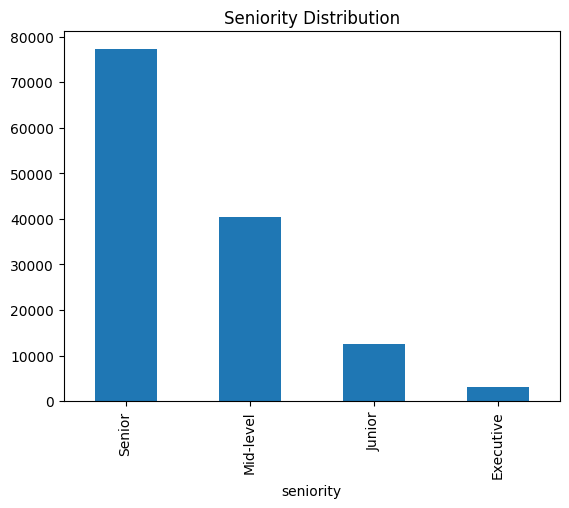

In [38]:
# We can use Pandas to create a simple graph, which is more limited than matplotlib and seaborn in terms of visual customization.

df_cleaned['seniority'].value_counts().plot(kind = 'bar', title = 'Seniority Distribution')

# We can begin to deeper understanding the data. For example, we can see that this company has much more seniors than mid-levels and juniors.

# Is this company preparing for business continuity in the future? It is important to relate what data shows with the problem we as analysts must help to solve.

In [39]:
import seaborn as sns

# This library is interesting because it allows the user to plot additional information on the visuals, such as standard deviation.

<Axes: xlabel='seniority', ylabel='usd'>

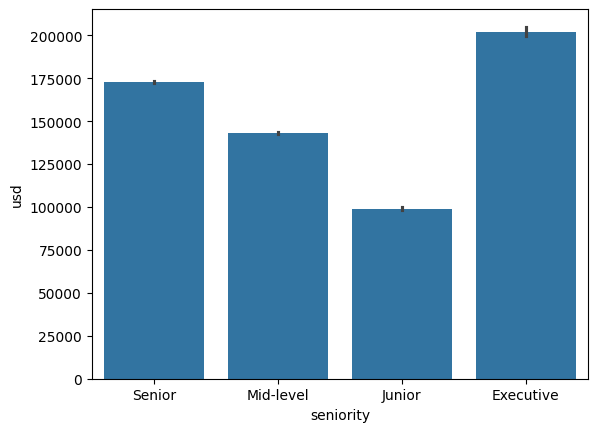

In [40]:
sns.barplot(data = df_cleaned, x = 'seniority', y = 'usd')

In [41]:
# We are now importing the matplotlib to work alongside with the pandas and seaborn libraries.

import matplotlib.pyplot as plt

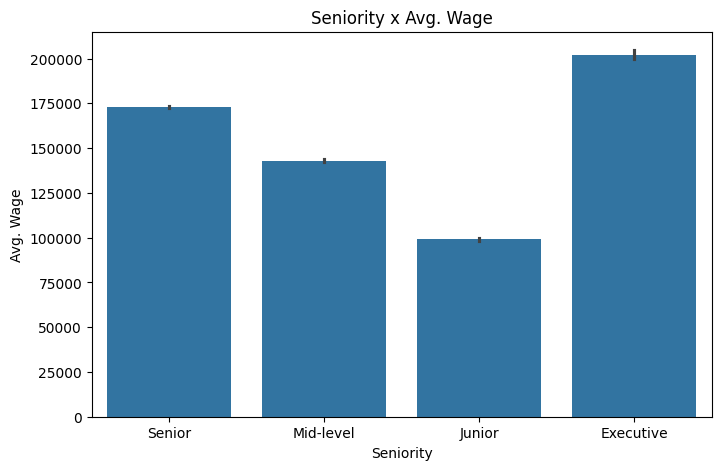

In [42]:
# Defining the figure size:
plt.figure(figsize = (8,5))

# Using seaborn to plot the visual:
sns.barplot(data = df_cleaned, x = 'seniority', y = 'usd')

# Defining the axis labels:
plt.title('Seniority x Avg. Wage')
plt.xlabel('Seniority')
plt.ylabel('Avg. Wage')

# Showing the plot:
plt.show()

In [43]:
# Grouping data:
df_cleaned.groupby('seniority')['usd'].mean().sort_values(ascending = False)

,usd
seniority,
Executive,202027.667813
Senior,172850.838301
Mid-level,143044.845979
Junior,99034.963267


In [44]:
# Creating a new variable with the grouped data:

'''The '.index' in the end indicates that we want to save this information inside the variable called 'order'.'''

order = df_cleaned.groupby('seniority')['usd'].mean().sort_values(ascending = False).index

order

Index(['Executive', 'Senior', 'Mid-level', 'Junior'], dtype='object', name='seniority')

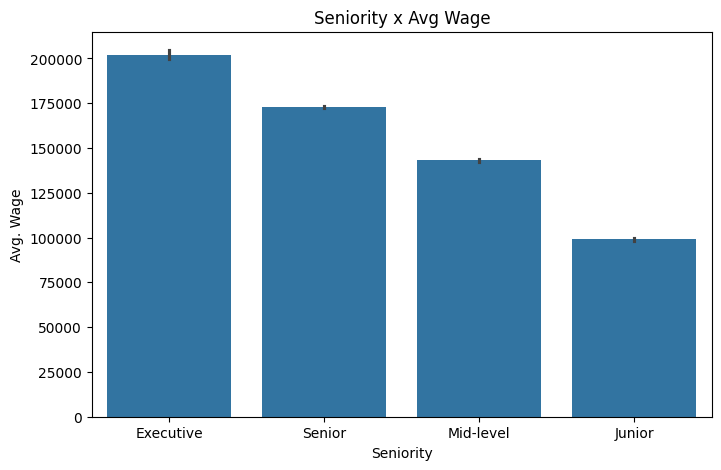

In [45]:
'''Recreating the visual with the new variable'''

# Defining the figure size:
plt.figure(figsize = (8,5))

# Using seaborn to plot the visual:
sns.barplot(data = df_cleaned, x = 'seniority', y = 'usd', order = order)

# Defining the axis labels:
plt.title('Seniority x Avg Wage')
plt.xlabel('Seniority')
plt.ylabel('Avg. Wage')

# Showing the plot:
plt.show()

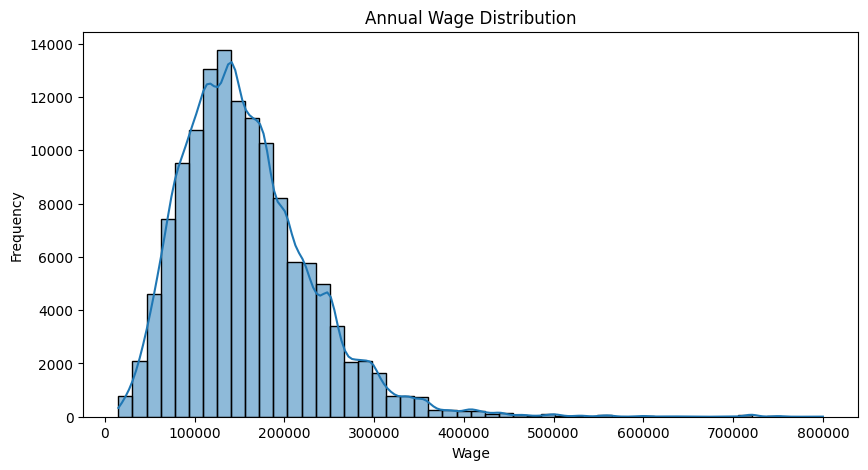

In [46]:
'''Creating a Histogram'''

# The visual bellow shows that the distribution is not normal since the data is more concentrated on the left side where the lower values are (right skewed).

# If the distribution was normal we would have the peak in the center of the plot.

# Defining figure size:
plt.figure(figsize = (10,5))

# Using seaborn to plot the visual and adding a kde line (density line):

sns.histplot(df_cleaned['usd'], bins = 50, kde = True)

# Defining the axis labels:
plt.title('Annual Wage Distribution')
plt.xlabel('Wage')
plt.ylabel('Frequency')

plt.show()

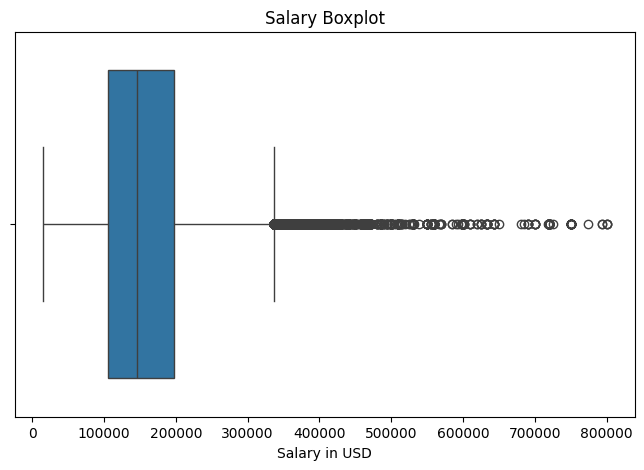

In [47]:
'''Creating a Boxplot'''

# We can obtain meaningful information through this visual, such as the median (the central line on the graph), the quartiles, and outliers (dots).

# It enhances the insights from the Histogram but presents them in a different format.

# Defining the figure size:
plt.figure(figsize = (8,5))

# Using seaborn to plot the visual:
sns.boxplot(x  = df_cleaned ['usd'])

# Defining the axis labels:
plt.title('Salary Boxplot')
plt.xlabel('Salary in USD')

plt.show()

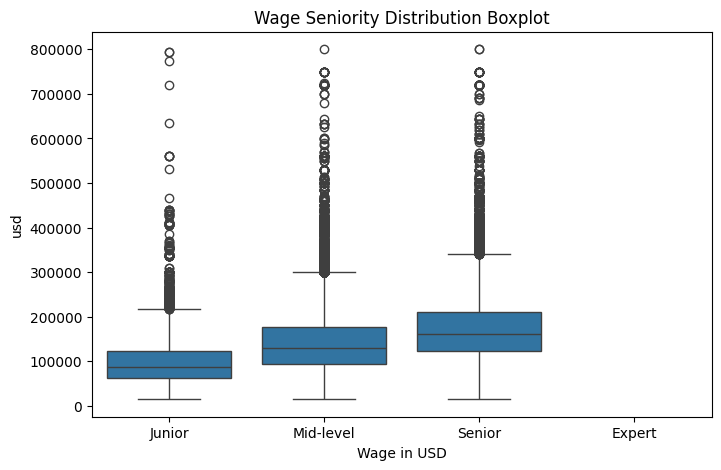

In [48]:
'''Creating a Boxplot for each salary seniority level'''

# The company can set goals of salaries to attract talents by using the information obtained in this visual.

order_seniority = ['Junior', 'Mid-level', 'Senior', 'Expert']

# Defining the figure size:
plt.figure(figsize = (8,5))

# Using seaborn to plot the visual:
sns.boxplot(x = 'seniority', y = 'usd', data = df_cleaned, order = order_seniority)

# Defining the axis labels:
plt.title('Wage Seniority Distribution Boxplot')
plt.xlabel('Wage in USD')

plt.show()

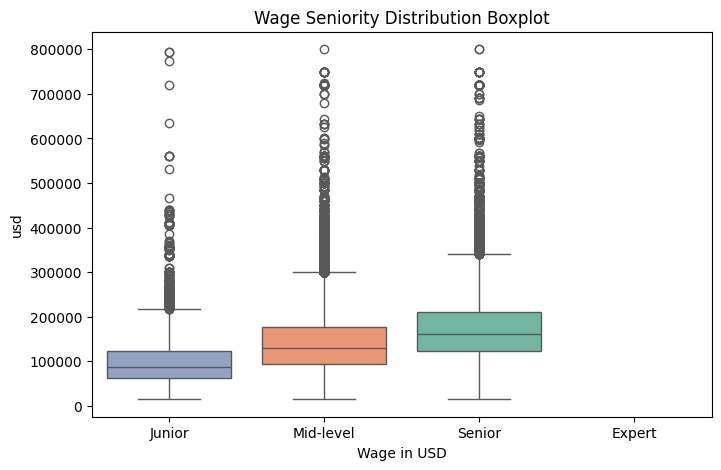

In [49]:
'''Changing bin colors on the Boxplot for each wage seniority level'''

# The company can set goals of salaries to atract talents by using the information obtained in this visual.

order_seniority = ['Junior', 'Mid-level', 'Senior', 'Expert']

# Defining the figure size:
plt.figure(figsize = (8,5))

# Using seaborn to plot the visual and adding colors for each bin using 'palette' and 'hue':
sns.boxplot(x = 'seniority', y = 'usd', data = df_cleaned, order = order_seniority, palette = 'Set2', hue = 'seniority')

# Defining the axis labels:
plt.title('Wage Seniority Distribution Boxplot')
plt.xlabel('Wage in USD')

plt.show()

In [50]:
import plotly.express as px

# By importing this library we can create visuals where we can see information by hovering over each bin of a bar graph for example.

In [51]:
'''Creating a Bar Plot of average salary by seniority using Plotly'''

# Grouping data by seniority and calculating the mean salary, then sorting in descending order
df_avg_salary_by_seniority = df_cleaned.groupby('seniority')['usd'].mean().reset_index().sort_values(by='usd', ascending=False)

# Defining the order of seniority levels for the plot based on the sorted data
order_seniority = df_avg_salary_by_seniority['seniority'].tolist()

# Creating the Bar Plot
fig = px.bar(df_avg_salary_by_seniority,
             x='seniority',
             y='usd',
             title='Seniority x Avg. Wage',
             labels={'seniority': 'Seniority', 'usd': 'Avg. Wage (USD)'},
             category_orders={'seniority': order_seniority})

# Displaying the plot
fig.show()

In [52]:
'''Creating a pie plot of average salary by seniority using Plotly'''

remote_counting = df_cleaned['work_type'].value_counts().reset_index()
remote_counting.columns = ['work_type', 'quantity']

# Creating the pie plot
fig = px.pie(remote_counting,
             names='work_type',
             values='quantity',
             title='Work Type Proportion'
             )

# Displaying the plot
fig.show()

In [53]:
'''Creating a donut plot of average salary by seniority using Plotly'''

remote_counting = df_cleaned['work_type'].value_counts().reset_index()
remote_counting.columns = ['work_type', 'quantity']

# Creating the pie plot
fig = px.pie(remote_counting,
             names='work_type',
             values='quantity',
             title='Work Type Proportion',
             hole = 0.5   # Donut hole size.
             )

fig.update_traces(textinfo = 'percent + label')  # Displays not only the percentage, but also the label of each category.

# Displaying the plot
fig.show()

In [54]:
'''CHALLENGE: Create a visual to represent the data scientists average wage per country'''

!pip install pycountry

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 14.4 MB/s eta 0:00:00


In [61]:
import pycountry
import plotly.express as px

# Now, we'll turn country info into ISO-3.

''' This function converts a country value to ISO-3 by first checking if it’s already ISO-3,
then applying a few simple fixes (as in UK to GBR), then trying an ISO-2 lookup, and finally guessing
from the country name. '''

def iso2_to_iso3(code):
    if code is None:
        return None
    s = str(code).strip()
    if not s:
        return None

    # Checking if it's already ISO-3:
    if len(s) == 3 and s.isalpha():
        return s.upper()

    s_up = s.upper()

    # Common odd inputs that can generate errors:
    if s_up == "UK":   # people often write UK (and it's ISO-2 is GB)
        return "GBR"
    if s_up == "XK":   # this is Kosovo's ISO-2.
        return "XKX"

    # Treating value as ISO-2 and then converting to ISO-3 using pycountry:
    c = pycountry.countries.get(alpha_2=s_up)
    if c:
        return c.alpha_3

    # If it's not a code, we'll try matching the country name (such as "Czechia", and "Ivory Coast") and return ISO-3:
    try:
        return pycountry.countries.search_fuzzy(s)[0].alpha_3
    except Exception:
        return None

# Creating the ISO-3 column on database:
df_cleaned["residence_iso3"] = df_cleaned["residence"].apply(iso2_to_iso3)

# Keeping only Data Scientist rows and valid ISO-3:
df_ds = df_cleaned[df_cleaned["job_title"] == "Data Scientist"]
df_ds = df_ds[df_ds["residence_iso3"].notna()]

# Retrieving the average salary by country:
avg_country = df_ds.groupby("residence_iso3", as_index=False)["usd"].mean()

# Map visual:
fig = px.choropleth(
    avg_country,
    locations="residence_iso3",
    locationmode="ISO-3",
    color="usd",
    color_continuous_scale="RdYlGn",
    title="Data Scientist Wage by Country",
    labels={"usd": "Avg Wage", "residence_iso3": "Country"},
)

fig.show()

** For the countries where the color is white, there is no available data.

In [56]:
df_cleaned.head()

# Just checking how the database changed after the map visual creation.

,year,seniority,contract,job_title,salary,currency,usd,residence,work_type,company_location,company_size,residence_iso3
0,2025,Senior,Full-time,Solutions Engineer,214000,USD,214000,US,Hybrid,US,Medium,USA
1,2025,Senior,Full-time,Solutions Engineer,136000,USD,136000,US,Hybrid,US,Medium,USA
2,2025,Mid-level,Full-time,Data Engineer,158800,USD,158800,AU,On-site,AU,Medium,AUS
3,2025,Mid-level,Full-time,Data Engineer,139200,USD,139200,AU,On-site,AU,Medium,AUS
4,2025,Junior,Full-time,Data Engineer,90000,USD,90000,US,On-site,US,Medium,USA


In [58]:
import pycountry
import plotly.express as px

''' Generating the final dataset with the ISO-3 column. '''

def iso2_to_iso3(code):
    if code is None:
        return None
    s = str(code).strip()
    if not s:
        return None

    # Checking if it's already ISO-3:
    if len(s) == 3 and s.isalpha():
        return s.upper()

    s_up = s.upper()

    # Common odd inputs that can generate errors:
    if s_up == "UK":   # people often write UK (and it's ISO-2 is GB)
        return "GBR"
    if s_up == "XK":   # this is Kosovo's ISO-2.
        return "XKX"

    # Treating value as ISO-2 and then converting to ISO-3 using pycountry:
    c = pycountry.countries.get(alpha_2=s_up)
    if c:
        return c.alpha_3

    # If it's not a code, we'll try matching the country name (such as "Czechia", and "Ivory Coast") and return ISO-3:
    try:
        return pycountry.countries.search_fuzzy(s)[0].alpha_3
    except Exception:
        return None

# Creating the ISO-3 column on database:
df_cleaned["residence_iso3"] = df_cleaned["residence"].apply(iso2_to_iso3)

df_cleaned.head()


,year,seniority,contract,job_title,salary,currency,usd,residence,work_type,company_location,company_size,residence_iso3
0,2025,Senior,Full-time,Solutions Engineer,214000,USD,214000,US,Hybrid,US,Medium,USA
1,2025,Senior,Full-time,Solutions Engineer,136000,USD,136000,US,Hybrid,US,Medium,USA
2,2025,Mid-level,Full-time,Data Engineer,158800,USD,158800,AU,On-site,AU,Medium,AUS
3,2025,Mid-level,Full-time,Data Engineer,139200,USD,139200,AU,On-site,AU,Medium,AUS
4,2025,Junior,Full-time,Data Engineer,90000,USD,90000,US,On-site,US,Medium,USA


In [59]:
df_cleaned.to_csv('final-dataset.csv', index = False)

# Saving the final cleaned data.

# CLASS 04

Dashboard Creation using VS Code

For this class VS Code will be used. Thefore the following steps we're applied on the VS Code terminal.

**1. Virtual environment creation:**

python3 -m venv .venv

**2. Virtual environment activation for Windows:**

.venv\Scripts\Activate

**3. Virtual environment activation for MAC/OS:**

source .venv/bin/activate

**4. Create a new file ('requirements.txt') with all the libraries (requirements) that will be used on this project:**

VS Code > File > New text file > insert the text bellow:

* pandas==2.2.3
* streamlit==1.44.1
* plotly==5.24.1

**5. Installation of the libraries:**

pip install -r requirements.txt

**6. Create the Streamlit Dashboard interface:**

The Streamlit is the library that will allow us to create a page for the dashboard.

streamlit run app.py

**7. Deploy the Dashboard on Streamlit Cloud:**

https://streamlit.io/cloud


>> The full code written on the VS Code file (app.py) it's down bellow.

In [63]:
# Full code used on VS Code file (app.py):

'''
import streamlit as st
import pandas as pd
import plotly.express as px

# --- Set Page ---
# Defines page title, icon and layout.
st.set_page_config(
    page_title="Salary Dashboard in the Data Field",
    page_icon="📊",
    layout="wide",
)

# --- Data Retrieving ---
df = pd.read_csv("https://raw.githubusercontent.com/lucianapopa/Python_Data_Analysis_Event_Alura/main/final-dataset_GoogleColab.csv")

# ---- Labels for filters ----
seniority_map = {
    "junior": "Junior",
    "mid-level": "Mid-level",
    "senior": "Senior",
    "executive": "Executive",
}

contract_map = {
    "full-time": "Full-time", "ft": "Full-time",
    "part-time": "Part-time", "pt": "Part-time",
    "contract": "Contract",   "ct": "Contract",
    "freelance": "Freelance", "fl": "Freelance",
}

size_map = {
    "s": "Small (1–50)",   "small": "Small (1–50)",
    "m": "Medium (51–250)","medium": "Medium (51–250)",
    "l": "Large (251–1000)","large": "Large (251–1000)"
}

# --- Sidebar (Filters) ---
# This section creates a sidebar for filtering the data based on various criteria such as year, seniority, contract and company size.
st.sidebar.header("🔍 Filters")

# Year Filter
# Unique years are extracted from the DataFrame and sorted for display.
available_years = sorted(df['year'].unique())
selected_years = st.sidebar.multiselect("Year", available_years, default=available_years)

# Seniority Filter
# Unique seniority levels are extracted from the DataFrame and sorted for display.
available_seniority = sorted(df['seniority'].unique())
selected_seniority = st.sidebar.multiselect("Seniority", available_seniority, default=available_seniority, format_func=lambda x: seniority_map.get(str(x).lower(), x))

# Contract Filter
# Unique contract types are extracted from the DataFrame and sorted for display.
available_contract = sorted(df['contract'].unique())
selected_contract = st.sidebar.multiselect("Contract", available_contract, default=available_contract,  format_func=lambda x: contract_map.get(str(x).lower(), x))

# Company Size Filter
# Unique company sizes are extracted from the DataFrame and sorted for display.
available_sizes = sorted(df['company_size'].unique())
selected_sizes = st.sidebar.multiselect("Company Size", available_sizes, default=available_sizes, format_func=lambda x: size_map.get(str(x).lower(), x))

# --- DataFrame Filtering ---
# The main DataFrame is filtered based on the selections made in the sidebar.
df_filtered = df[
    (df['year'].isin(selected_years)) &
    (df['seniority'].isin(selected_seniority)) &
    (df['contract'].isin(selected_contract)) &
    (df['company_size'].isin(selected_sizes))
]

# --- Main Content ---
# Title and Introduction
st.title("🎲 Salary Analysis Dashboard in the Data Field")
st.markdown("Explore salary data in the data field over the past years. Use the filters on the left to refine your analysis.")

# --- Main Metrics (KPIs) ---
# This section displays key performance indicators based on the filtered DataFrame.
st.subheader("General Metrics (Annual Salary in USD)")

if not df_filtered.empty:
    avg_salary = df_filtered['usd'].mean()
    max_salary = df_filtered['usd'].max()
    total_count = df_filtered.shape[0]
    most_common_job_position = df_filtered["job_title"].mode()[0]
else:
    avg_salary, max_salary, total_count, most_common_job_position = 0, 0, 0, ""

col1, col2, col3, col4 = st.columns(4)
col1.metric("Avg. Salary", f"${avg_salary:,.0f}")
col2.metric("Max. Salary", f"${max_salary:,.0f}")
col3.metric("Total Count", f"{total_count:,}")
col4.metric("Most Common Job Position", most_common_job_position)

st.markdown("---")

# --- Visual Analysis with Plotly ---
# This section contains various visualizations to analyze the data based on the filters applied.
st.subheader("Visuals (Charts and Graphs)")

col_graf1, col_graf2 = st.columns(2)

with col_graf1:
    if not df_filtered.empty:
        top_job_title = df_filtered.groupby('job_title')['usd'].mean().nlargest(10).sort_values(ascending=True).reset_index()
        graph_job_title = px.bar(
            top_job_title,
            x='usd',
            y='job_title',
            orientation='h',
            title="Top 10 Job Positions by Average Salary",
            labels={'usd': 'Avg. Annual Salary (USD)', 'Job Position': ''}
        )
        graph_job_title.update_traces(
            marker_color="#0d0887",
            marker_line_color="white",
            marker_line_width=0.5
        )
        graph_job_title.update_layout(title_x=0.1, yaxis={'categoryorder':'total ascending'})
        st.plotly_chart(graph_job_title, use_container_width=True)
    else:
        st.warning("No data to display in the job positions chart.")

with col_graf2:
    if not df_filtered.empty:
        graph_hist = px.histogram(
            df_filtered,
            x='usd',
            nbins=30,
            title="Annual Salary Distribution",
            labels={'usd': 'Salary Range (USD)', 'count': ''}
        )
        graph_hist.update_traces(
            marker_color="#0d0887",
            marker_line_color="white",
            marker_line_width=0.5
        )
        graph_hist.update_layout(title_x=0.1)
        st.plotly_chart(graph_hist, use_container_width=True)
    else:
        st.warning("No data to display in the distribution chart.")

col_graf3, col_graf4 = st.columns(2)

with col_graf3:
    if not df_filtered.empty:
        remote_count = df_filtered['work_type'].value_counts().reset_index()
        remote_count.columns = ['Work Type', 'Count']
        graph_work_type = px.pie(
            remote_count,
            names='Work Type',
            values='Count',
            color='Work Type',
        color_discrete_map={
            'On-site': '#0d0887',   # dark blue
            'Hybrid':  '#d8576b',   # light purple/ pink
            'Remote':  '#9c179e'    # purple
        },
            category_orders={'Work Type': ['On-site', 'Hybrid', 'Remote']},
            title='Proportion of Work Types',
            hole=0.5
        )
        graph_work_type.update_traces(textinfo='percent+label')
        graph_work_type.update_layout(title_x=0.1)
        st.plotly_chart(graph_work_type, use_container_width=True)
    else:
        st.warning("No data to display in the work types chart.")

with col_graf4:
    if not df_filtered.empty:
        df_ds = df_filtered[df_filtered['job_title'] == 'Data Scientist']
        countries_avg = df_ds.groupby('residence_iso3')['usd'].mean().reset_index()
        graph_countries = px.choropleth(
            countries_avg,
            locations='residence_iso3',
            locationmode='ISO-3',
            color='usd',
            color_continuous_scale='RdBu',
            title='Avg. Data Scientist Salary by Country',
            labels={'usd': 'Avg. Salary (USD)', 'residence_iso3': 'Country'},
            hover_name='residence_iso3'
        )
        graph_countries.update_layout(title_x=0.1)
        st.plotly_chart(graph_countries, use_container_width=True)
    else:
        st.warning("No data to display in the countries chart.")

# --- Detailed Data Table ---
# This section displays the filtered DataFrame in a table format for detailed analysis.
st.subheader("Detailed Data Table")
st.dataframe(df_filtered)

'''

'\nimport streamlit as st\nimport pandas as pd\nimport plotly.express as px\n\n# --- Set Page ---\n# Defines page title, icon and layout.\nst.set_page_config(\n    page_title="Salary Dashboard in the Data Field",\n    page_icon="📊",\n    layout="wide",\n)\n\n# --- Data Retrieving ---\ndf = pd.read_csv("https://raw.githubusercontent.com/lucianapopa/Python_Data_Analysis_Event_Alura/main/final-dataset_GoogleColab.csv")\n\n# ---- Labels for filters ----\nseniority_map = {\n    "junior": "Junior",\n    "mid-level": "Mid-level",\n    "senior": "Senior",\n    "executive": "Executive",\n}\n\ncontract_map = {\n    "full-time": "Full-time", "ft": "Full-time",\n    "part-time": "Part-time", "pt": "Part-time",\n    "contract": "Contract",   "ct": "Contract",\n    "freelance": "Freelance", "fl": "Freelance",\n}\n\nsize_map = {\n    "s": "Small (1–50)",   "small": "Small (1–50)",\n    "m": "Medium (51–250)","medium": "Medium (51–250)",\n    "l": "Large (251–1000)","large": "Large (251–1000)"\n}\n\n#